In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df_ed = pd.read_csv('/content/df_ed_limpio.csv')

df_ed_cor = df_ed.drop(columns=[
    "oshpd_id2","FACILITY_NAME", "COUNTY_NAME", "LICENSE_CATEGORY_DESC",
    "DBA_ADDRESS1", "DBA_CITY", "DBA_ZIP_CODE"
])

# Convert character columns to numeric (if possible, handle errors)
for col in df_ed_cor.select_dtypes(include=['object']).columns:  # Iterate over string columns
    try:
        df_ed_cor[col] = pd.to_numeric(df_ed_cor[col])  # Attempt conversion
    except ValueError:
        print(f"Column '{col}' could not be converted to numeric. Check for non-numeric values.")
        # Option 1: Leave as is (if you need the original values)
        # Option 2: Convert to NaN for problematic values:
        # df_ed_cor[col] = pd.to_numeric(df_ed_cor[col], errors='coerce')
        # Option 3: Drop the column entirely:
        df_ed_cor = df_ed_cor.drop(columns=[col])

# Create subsets
df_ed_cor_admitted = df_ed_cor.filter(regex="^a_")  # Use regex for starts_with
df_ed_cor_only_ed = df_ed_cor.drop(columns=df_ed_cor_admitted.columns)  # Efficiently drop the 'a_' columns

Column 'LICENSED_BED_SIZE' could not be converted to numeric. Check for non-numeric values.
Column 'TRAUMA_CENTER_DESC' could not be converted to numeric. Check for non-numeric values.
Column 'MSSA_DESIGNATION' could not be converted to numeric. Check for non-numeric values.
Column 'RURAL_HOSPITAL_DESC' could not be converted to numeric. Check for non-numeric values.
Column 'TEACHING_HOSPITAL_DESC' could not be converted to numeric. Check for non-numeric values.
Column 'CONTROL_TYPE_DESC' could not be converted to numeric. Check for non-numeric values.
Column 'ER_SERVICE_LEVEL_DESC' could not be converted to numeric. Check for non-numeric values.
Column 'ed_lic_levl_end' could not be converted to numeric. Check for non-numeric values.


<ipython-input-5-79c7d639fe93>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ed = pd.read_csv('/content/df_ed_limpio.csv')


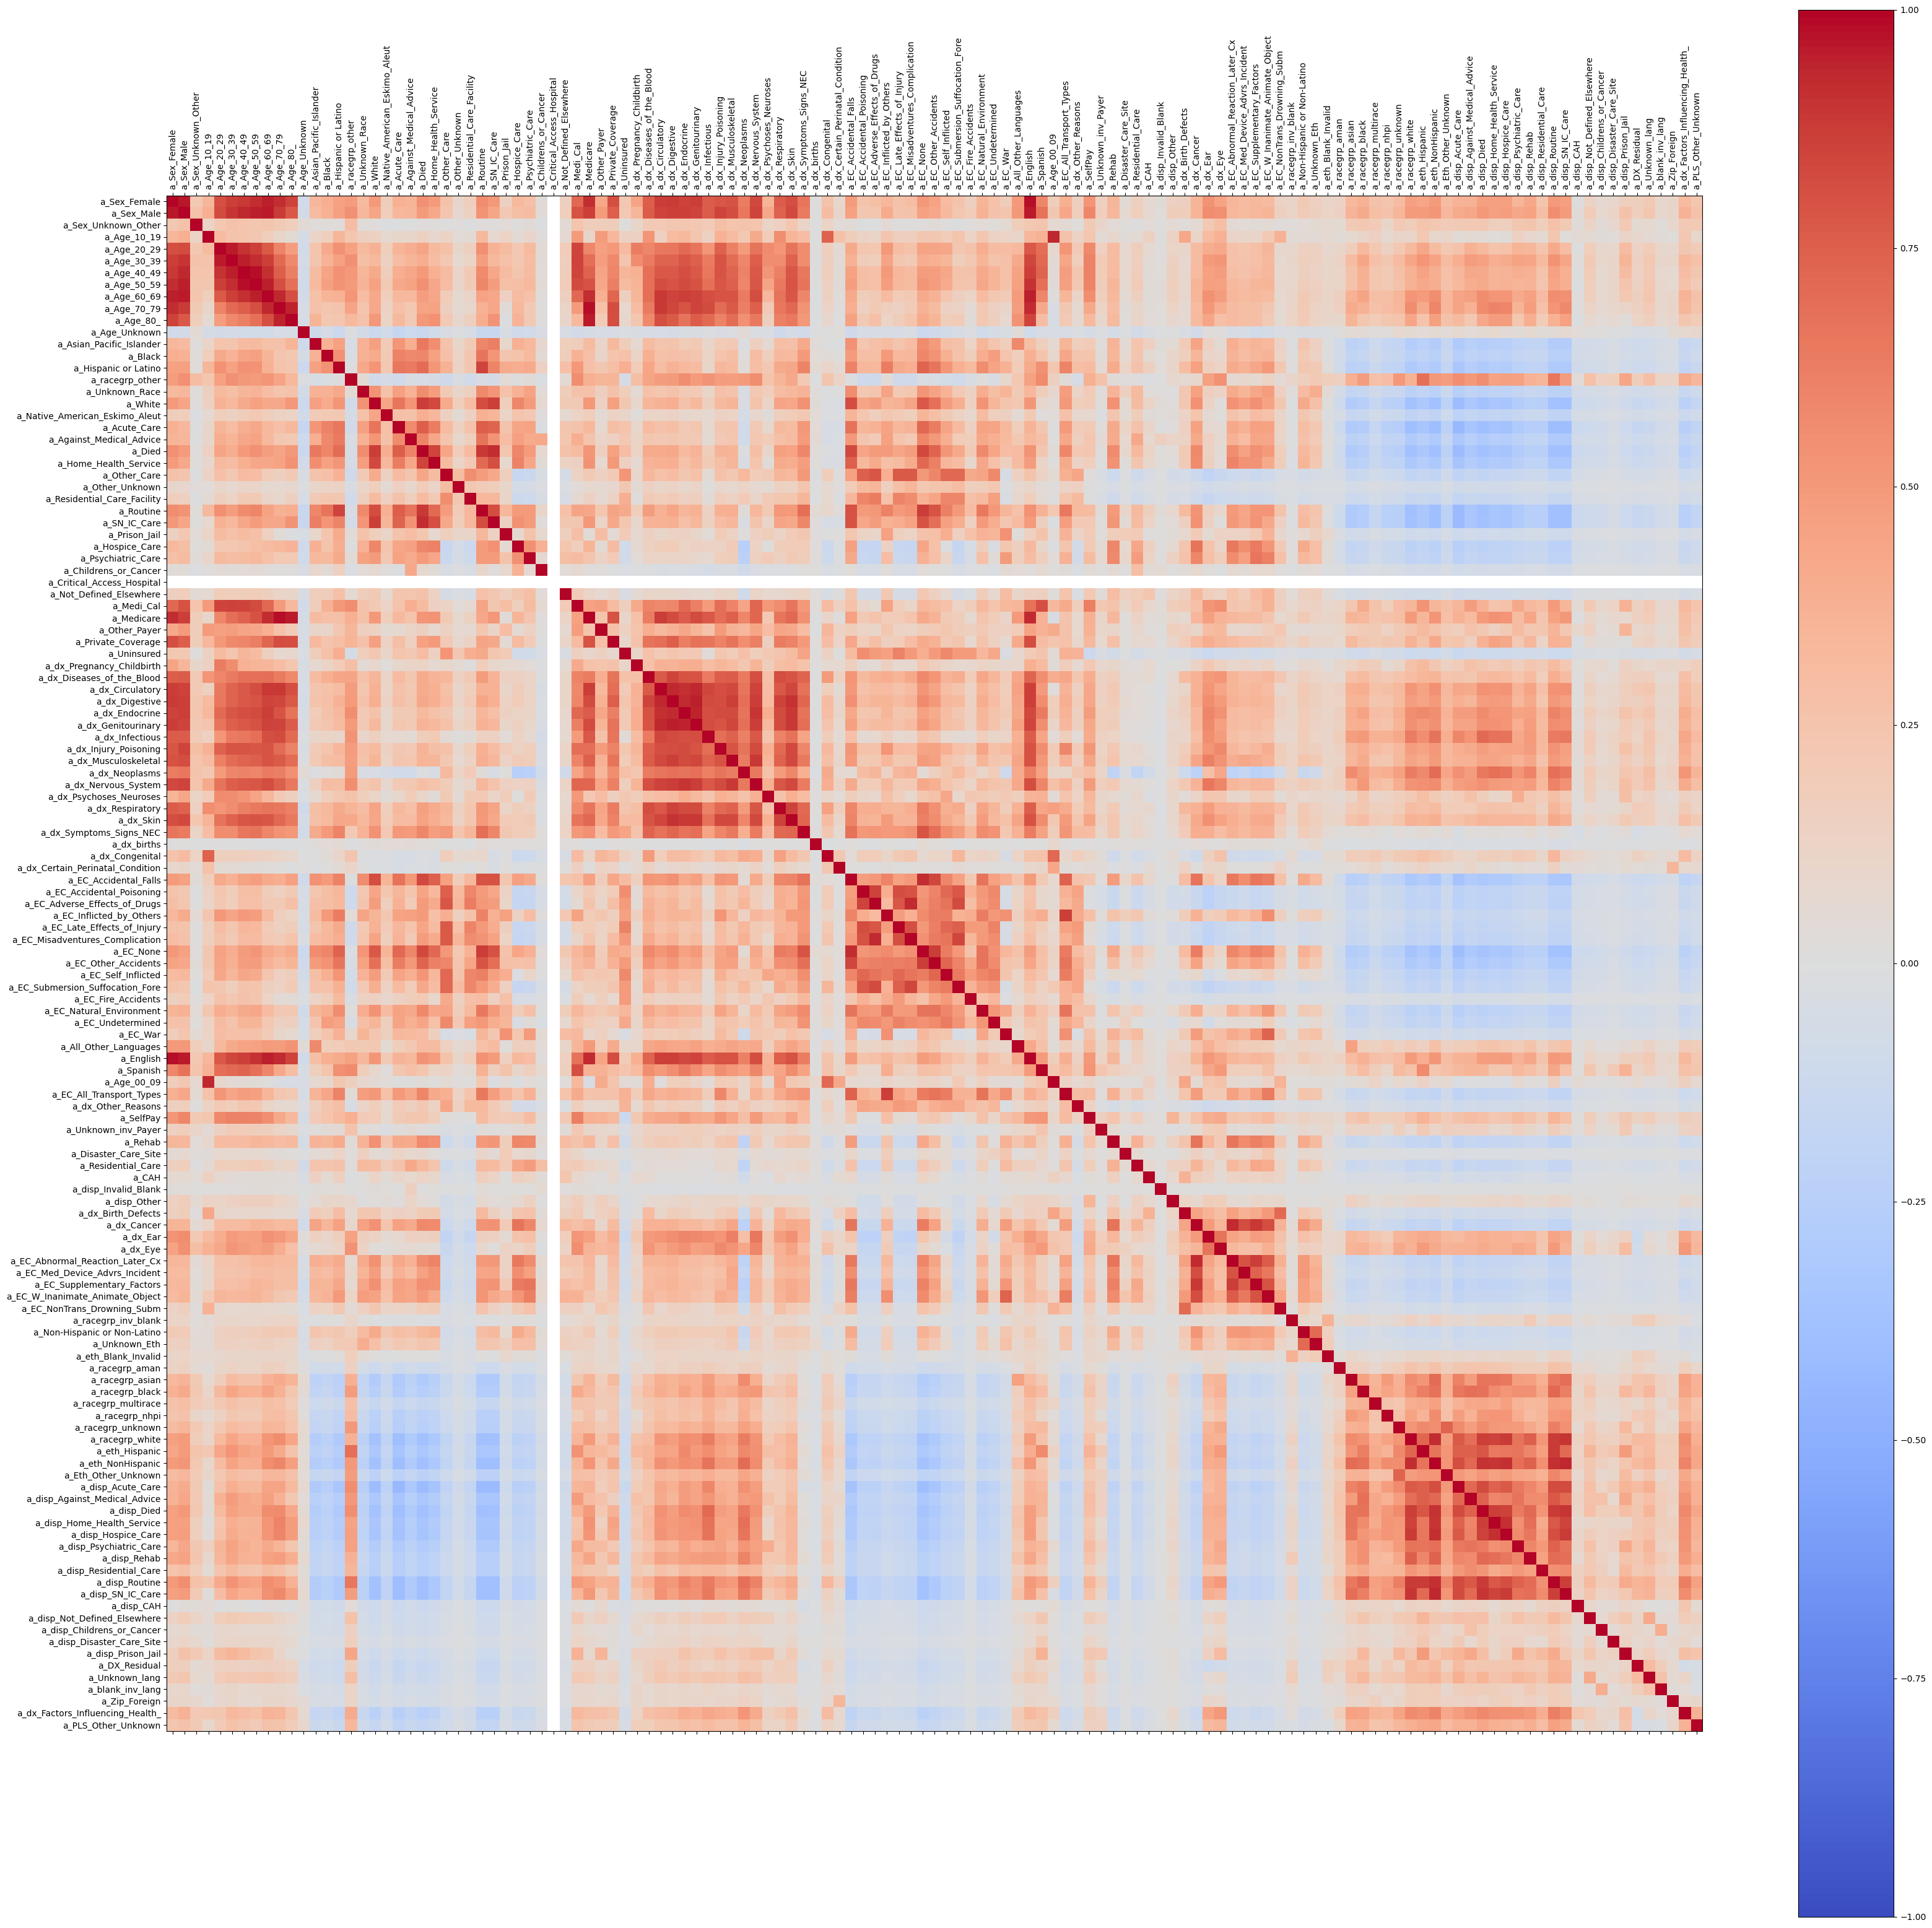

In [11]:
corr = df_ed_cor_admitted.corr()
fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_ed_cor_admitted.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_ed_cor_admitted.columns)
ax.set_yticklabels(df_ed_cor_admitted.columns)
plt.show()

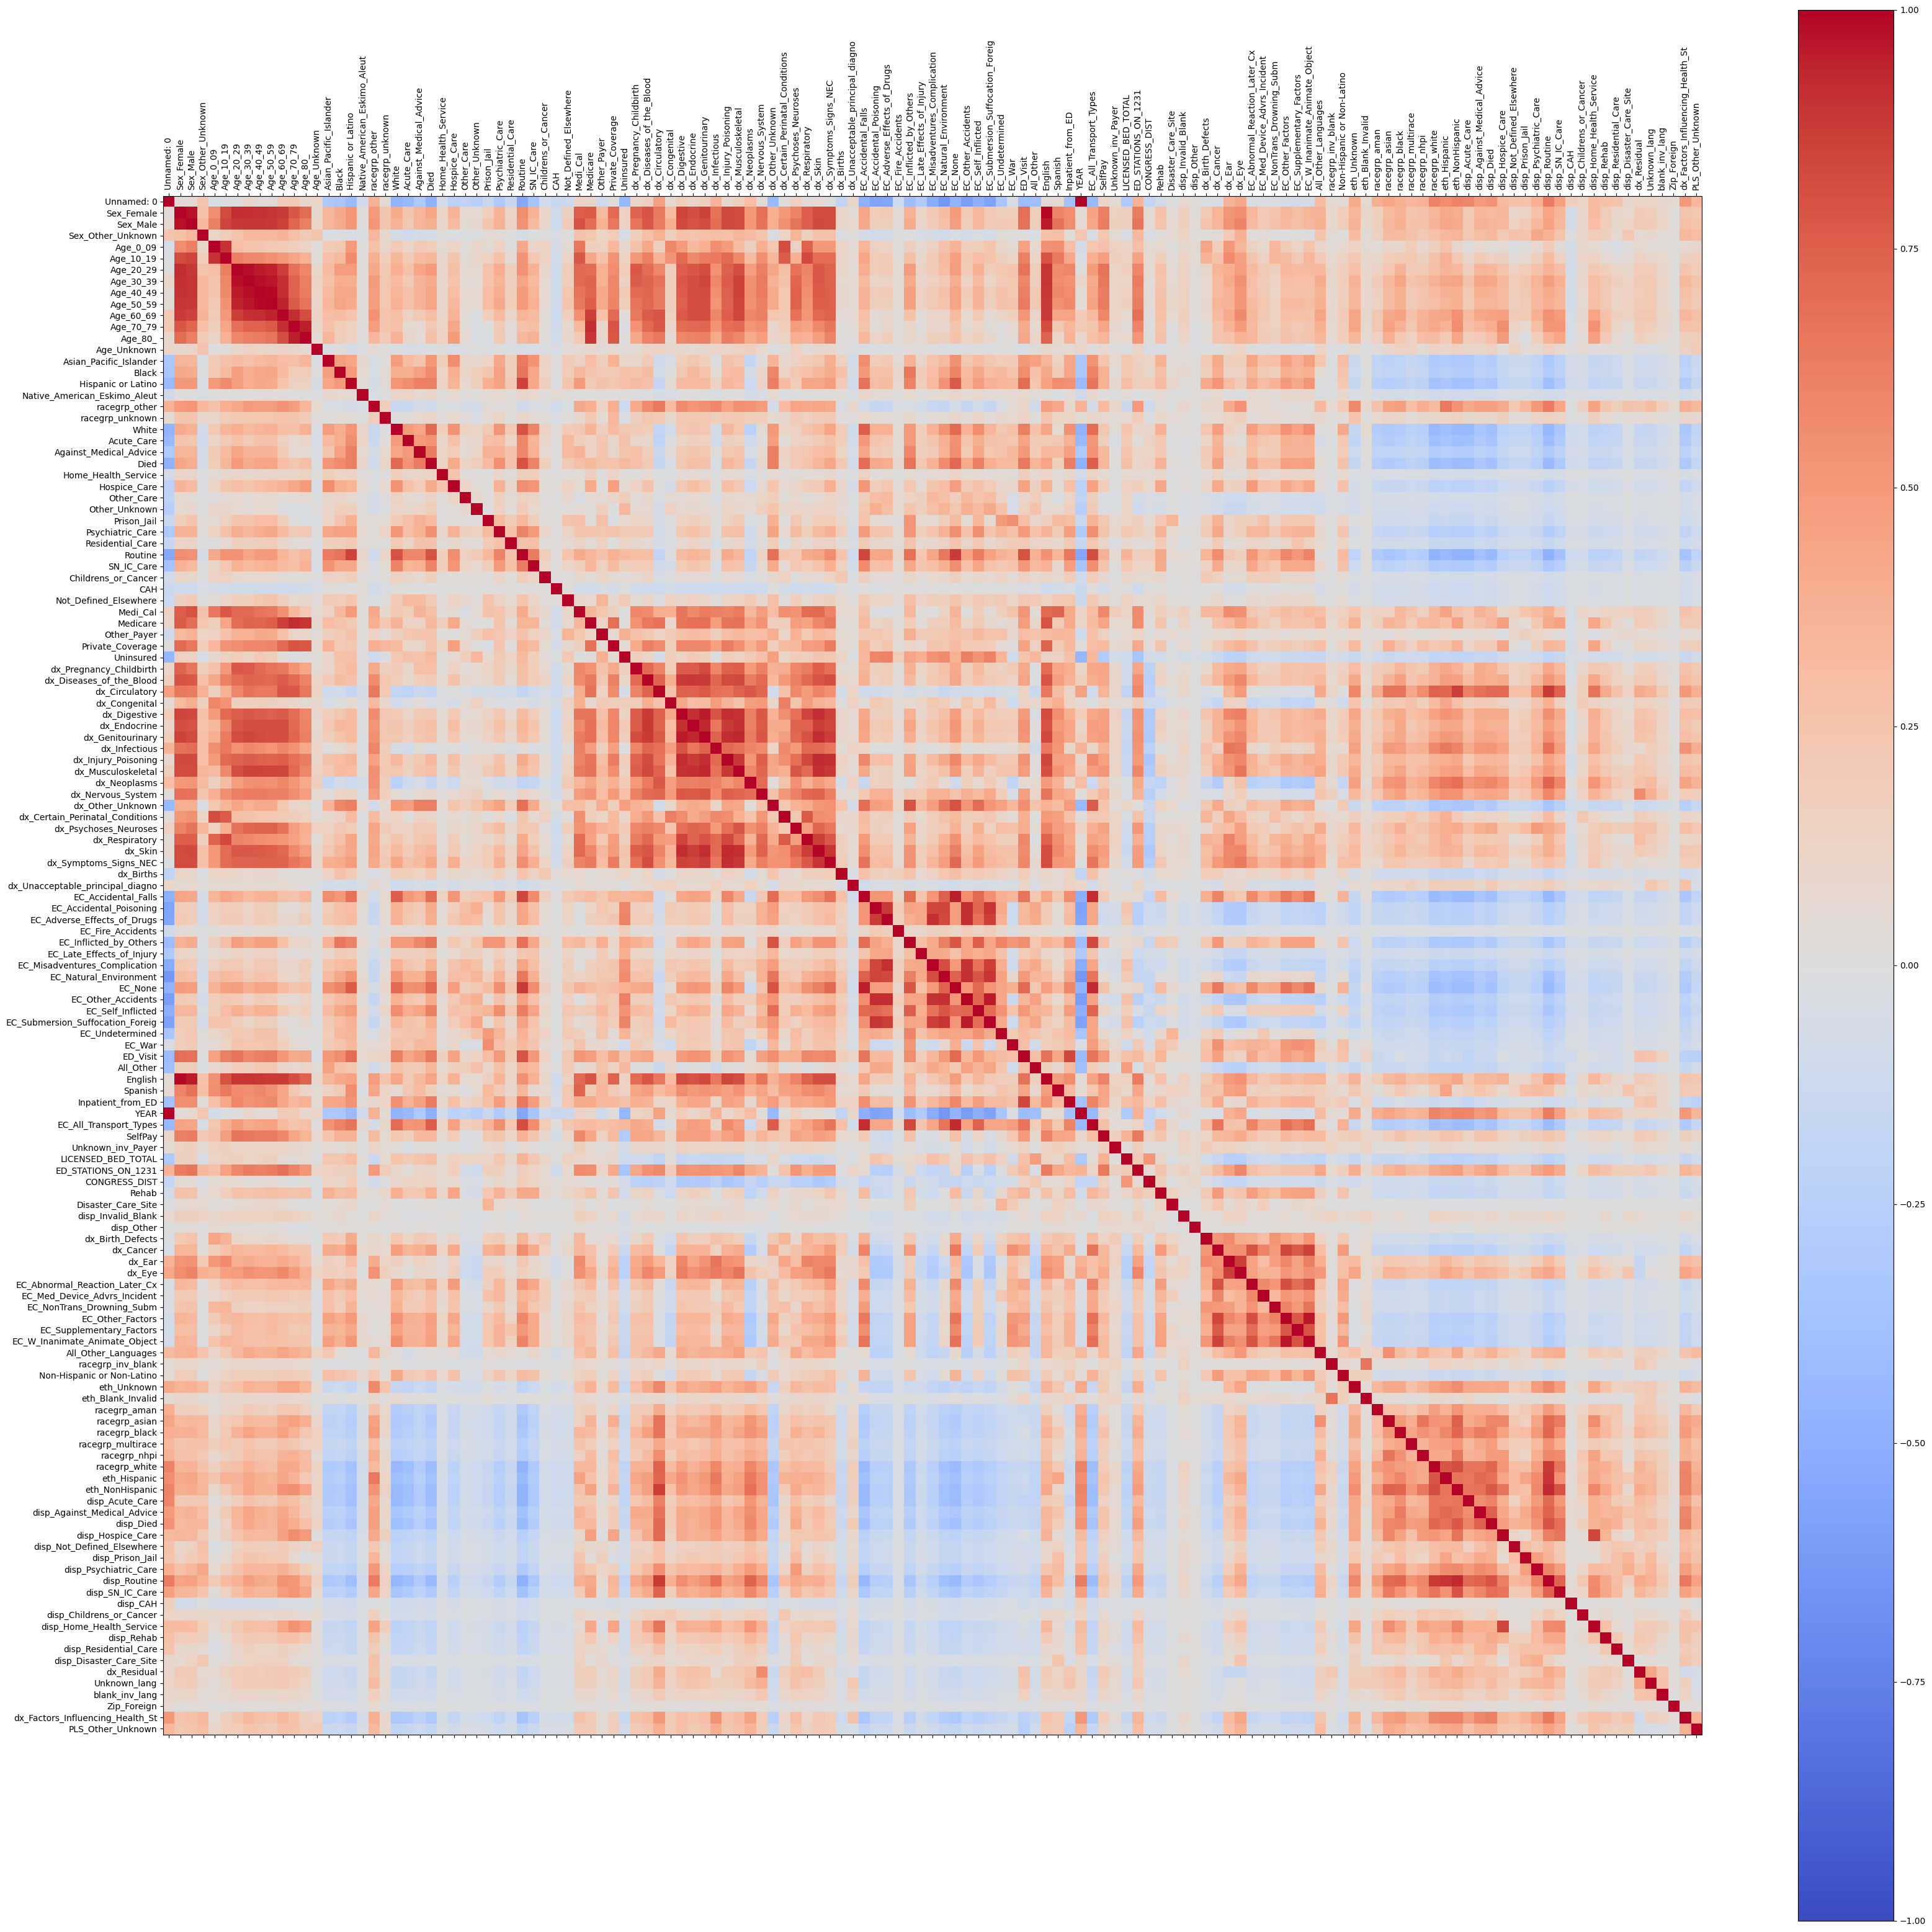

In [12]:
corr = df_ed_cor_only_ed.corr()
fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_ed_cor_only_ed.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_ed_cor_only_ed.columns)
ax.set_yticklabels(df_ed_cor_only_ed.columns)
plt.show()